In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.shape

(891, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [8]:
data.adult_male.unique()

array([ True, False])

In [9]:
data.alone.unique()

array([False,  True])

In [10]:
data.parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [11]:
data.drop(columns=['deck','alive','adult_male'],inplace=True)
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
embark_town      2
alone            0
dtype: int64

In [16]:
data['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [17]:
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
data['embark_town'].fillna(data['embark_town'].mode()[0],inplace=True)
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
embark_town      0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

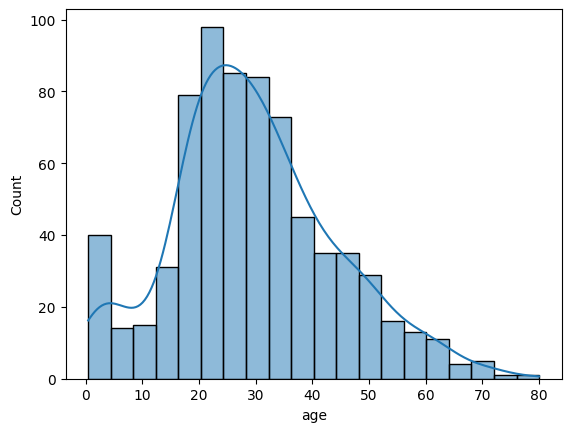

In [18]:
sns.histplot(data['age'],kde=True)

In [19]:
data['age'].fillna(data['age'].mean(),inplace=True)
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alone          0
dtype: int64

In [22]:
data.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
embark_town      3
alone            2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79c8701ce1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79c8701ce6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c8701cdf00>],
 'medians': [<matplotlib.lines.Line2D at 0x79c8701cec20>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c8701ceec0>],
 'means': []}

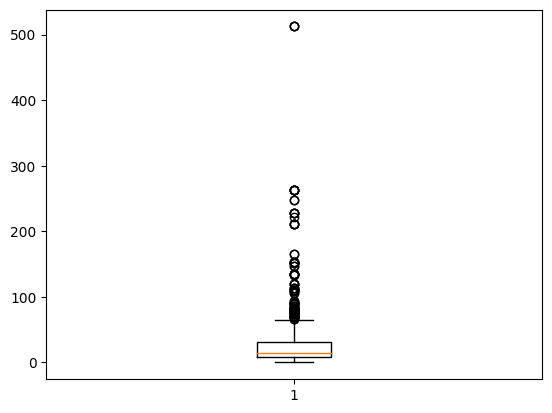

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(data['fare'])

In [25]:
categorical_cols = ['sex','class','embarked','who','embark_town','alone']
numerical_cols = ['age','fare']

In [26]:
data_encoded = pd.get_dummies(data,columns=categorical_cols,dtype=int,drop_first= True)
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,0,1,1


In [27]:
data_encoded.shape

(891, 16)

In [28]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   sex_male                 891 non-null    int64  
 7   class_Second             891 non-null    int64  
 8   class_Third              891 non-null    int64  
 9   embarked_Q               891 non-null    int64  
 10  embarked_S               891 non-null    int64  
 11  who_man                  891 non-null    int64  
 12  who_woman                891 non-null    int64  
 13  embark_town_Queenstown   891 non-null    int64  
 14  embark_town_Southampton  8

In [29]:
data_std_scaled = data_encoded.copy()

std_scaler = StandardScaler()
data_std_scaled[numerical_cols] = std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,-0.592481,1,0,-0.502445,1,0,1,0,1,1,0,0,1,0
1,1,1,0.638789,1,0,0.786845,0,0,0,0,0,0,1,0,0,0
2,1,3,-0.284663,0,0,-0.488854,0,0,1,0,1,0,1,0,1,1
3,1,1,0.407926,1,0,0.420730,0,0,0,0,1,0,1,0,1,0
4,0,3,0.407926,0,0,-0.486337,1,0,1,0,1,1,0,0,1,1


In [30]:
data_std_scaled.describe()

,survived,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18,0.647587,0.206510,0.551066,0.086420,0.725028,0.602694,0.304153,0.086420,0.725028,0.602694
std,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00,0.477990,0.405028,0.497665,0.281141,0.446751,0.489615,0.460306,0.281141,0.446751,0.489615
min,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
data_minmax_scaled = data_encoded.copy()

minmax_scaler = MinMaxScaler()
data_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,0.271174,1,0,0.014151,1,0,1,0,1,1,0,0,1,0
1,1,1,0.472229,1,0,0.139136,0,0,0,0,0,0,1,0,0,0
2,1,3,0.321438,0,0,0.015469,0,0,1,0,1,0,1,0,1,1
3,1,1,0.434531,1,0,0.103644,0,0,0,0,1,0,1,0,1,0
4,0,3,0.434531,0,0,0.015713,1,0,1,0,1,1,0,0,1,1


In [33]:
data_minmax_scaled.describe()

,survived,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.367921,0.523008,0.381594,0.062858,0.647587,0.206510,0.551066,0.086420,0.725028,0.602694,0.304153,0.086420,0.725028,0.602694
std,0.486592,0.836071,0.163383,1.102743,0.806057,0.096995,0.477990,0.405028,0.497665,0.281141,0.446751,0.489615,0.460306,0.281141,0.446751,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.367921,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,0.434531,1.000000,0.000000,0.060508,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
corr_columns =['survived',	'pclass',	'age',	'sibsp'	,'parch',	'fare'	]
original_data_corr = data_encoded[corr_columns].corr()
original_data_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [35]:
scaled_data_corr = data_std_scaled[corr_columns].corr()
scaled_data_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [36]:
minmax_data_corr = data_minmax_scaled[corr_columns].corr()
minmax_data_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000
